# Introduction to Scikit-Learn

## Question 1 (Classification)

**(i)** Read the classification datasets (training and test sets) into a NumPy array. This is a binary classification problem. As usual the last column is the class label (0 or 1). All other columns are numerical features.  
**(ii)** Using Scikit Learn build a basic kNN classifier model for this dataset (start with k=1) and assess its classification accuracy.  
**(iii)** Explore the impact of adopting various values of k on your model and different distance metrics.  
**(iv)** Next contrast the performance of the kNN model with other classification models. For example, try the following:
 - **a.** DecisionTreeClassifier  
 - **b.** Naïve Bayes  
 - **c.** SVM

In [1]:
import numpy as np

In [2]:
# load the data
train = np.genfromtxt('./classificationData-1/trainingData2.csv', delimiter=',')
test = np.genfromtxt('./classificationData-1/testData2.csv', delimiter=',')

X_train, y_train = train[:,:-1], train[:,-1]
X_test, y_test = test[:,:-1], test[:,-1]

In [3]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6875

In [4]:
for i in range(1, 10):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    print(i, clf.score(X_test, y_test))

1 0.6875
2 0.71875
3 0.7421875
4 0.703125
5 0.6796875
6 0.7109375
7 0.6953125
8 0.703125
9 0.6953125


In [5]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.71875

In [6]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.703125

In [7]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.65625

## Question 2 (Regression)

**(i)** In the exercise folder you will find a file called regressionExample.csv. Read this file into a NumPy array  
**(ii)** Use train_test_split to split the dataset into 20% test and 80% training.  
**(iii)** Use a KNeighborsRegressor to build a predictive model for the data and assess its accuracy using R2.

In [8]:
# load the data
train = np.genfromtxt('./regressionData-1.csv', delimiter=',')
X, y = train[:,:-1], train[:,-1]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.9998838570228713

## Question 3 (Outlier Detection)

**(i)** In the exercise folder you will find a zip file called outlierData.zip. This zip file contains a training file and test csv file. This is a regression problem and target value is contained in the last column in each file. Read this data into your program.  
**(ii)** Build a model using DecisionTreeRegressor and assess the accuracy (using R2).  
**(iii)** Identify any outliers in the training data using boxplots.  
**(iv)** Remove the outliers and reassess the new accuracy of the model. For the purposes of this exercise you can just focus on removing data points that are significantly distant from the upper and lower whiskers of the boxplot.  
**(v)** Try an alternative model such as a KNeighborsRegressor and record the accuracy.

In [11]:
# load the data
train = np.genfromtxt('./OutlierData/trainDataO.csv', delimiter=',')
test = np.genfromtxt('./OutlierData/test.csv', delimiter=',')

X_train, y_train = train[:,:-1], train[:,-1]
X_test, y_test = test[:,:-1], test[:,-1]

In [12]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.6056056814899182

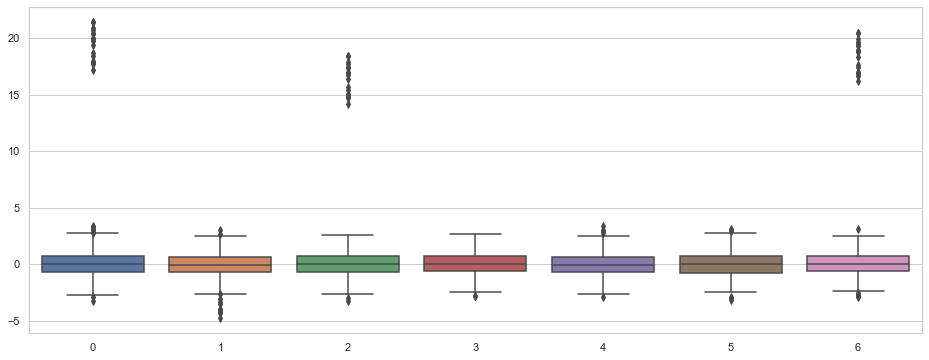

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

plt.figure(figsize=(16, 6))
ax = sns.boxplot(data=X_train)

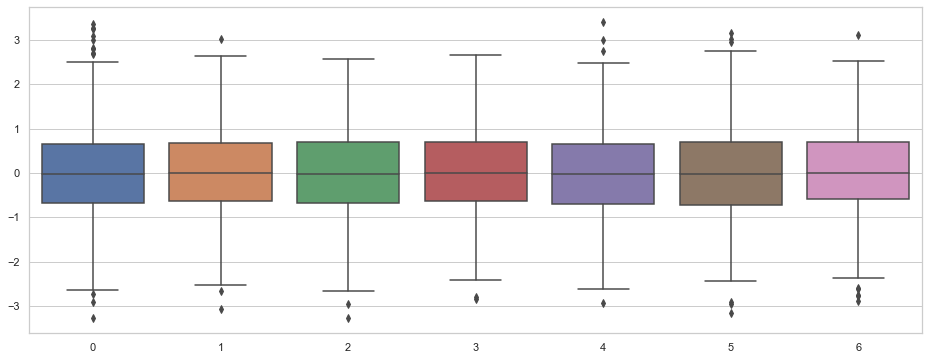

In [15]:
new_train = train[(train[:,0:7]<10).all(1)]

X_train, y_train = new_train[:,:-1], new_train[:,-1]
plt.figure(figsize=(16, 6))
ax = sns.boxplot(data=X_train)

In [16]:
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.693797960113229

In [17]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=7)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.8832256423375207